<a href="https://colab.research.google.com/github/TejasreeL/Color-Palette-Extractor-and-More/blob/main/Color_Palette_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install webcolors==1.13

  Attempting uninstall: webcolors
    Found existing installation: webcolors 24.11.1
    Uninstalling webcolors-24.11.1:
      Successfully uninstalled webcolors-24.11.1


In [16]:
# 🧩 BLOCK 1 — Imports + Setup + Helper Functions
"""
AI Color Intelligence Toolkit — Block 1
Author: Tejasree Lokireddy
Purpose: Import dependencies and define helper utilities.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw, ImageFilter
import json, colorsys, random, os

# Create output directory
os.makedirs("/content/output", exist_ok=True)

def rgb_to_hex(rgb):
    """Convert RGB tuple to HEX color code."""
    return '#%02x%02x%02x' % rgb

def display_image(img, title="Image"):
    """Show an image inline."""
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()

def create_color_bar(colors, title="Color Palette"):
    """Display color palette horizontally."""
    plt.figure(figsize=(8,2))
    for i, color in enumerate(colors):
        plt.fill_between([i, i+1], 0, 1, color=color)
    plt.axis('off')
    plt.title(title)
    plt.show()

Enter image path (e.g., /content/sample.jpg): /content/aesthetic-dreamy-background-purple-cloudy-sky-vector-glitter-design_53876-156334.jpg


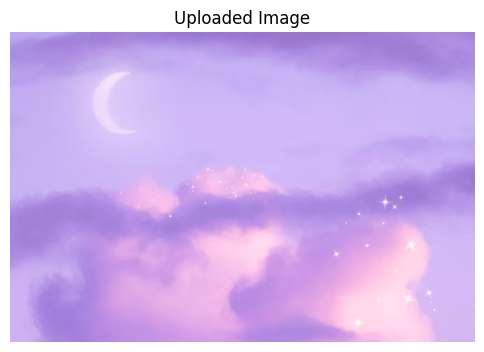


🎨 Dominant Colors (Light → Dark):
Color 1: #f9cdec
Color 2: #ccb6f5
Color 3: #e3abe8
Color 4: #c099e7
Color 5: #a886dd


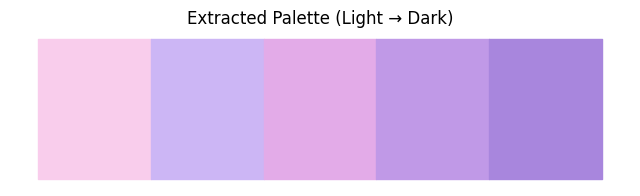


🧠 Palette Name: Vibrant Balanced Pulse
📖 Palette Story: This palette, 'Vibrant Balanced Pulse', evokes a modern mood with soft contrasts.


In [47]:
# 🧩 BLOCK 2 — Image Upload + Palette Extraction + Naming
"""
Extract dominant colors from image, name the palette, and display light → dark.
"""

# 👉 Upload / provide path
image_path = input("Enter image path (e.g., /content/sample.jpg): ").strip()
img = Image.open(image_path).convert('RGB')
display_image(img, "Uploaded Image")

# 👉 KMeans clustering
num_colors = 5
img_small = img.resize((150, 150))
pixels = np.array(img_small).reshape(-1, 3)

kmeans = KMeans(n_clusters=num_colors, random_state=42).fit(pixels)
colors = [tuple(map(int, center)) for center in kmeans.cluster_centers_]

# 👉 Sort colors (light → dark)
def brightness(c): return (0.299*c[0] + 0.587*c[1] + 0.114*c[2])
colors_sorted = sorted(colors, key=brightness, reverse=True)
hex_colors = [rgb_to_hex(c) for c in colors_sorted]

print("\n🎨 Dominant Colors (Light → Dark):")
for i, h in enumerate(hex_colors, 1):
    print(f"Color {i}: {h}")

create_color_bar(hex_colors, "Extracted Palette (Light → Dark)")

# 👉 Palette Naming
def name_palette(colors):
    avg_brightness = np.mean([brightness(c) for c in colors])
    avg_hue = np.mean([colorsys.rgb_to_hsv(*[x/255 for x in c])[0] for c in colors])
    tone = "Warm" if avg_hue < 0.1 or avg_hue > 0.8 else "Cool" if 0.5 < avg_hue < 0.7 else "Balanced"
    mood = "Vibrant" if avg_brightness > 160 else "Muted" if avg_brightness < 90 else "Soft"
    adjectives = ["Harmony", "Dream", "Pulse", "Whisper", "Glow", "Serenity"]
    return f"{mood} {tone} {random.choice(adjectives)}"

palette_name = name_palette(colors)
story = f"This palette, '{palette_name}', evokes a {random.choice(['calm','energetic','elegant','modern'])} mood with {random.choice(['balanced tones','soft contrasts','gentle gradients','crisp vibrance'])}."

print(f"\n🧠 Palette Name: {palette_name}")
print(f"📖 Palette Story: {story}")

In [72]:
# 🧩 BLOCK 3 — Export Palette as JSON + Display
"""
Save palette as JSON + show details inline.
"""

palette_data = {
    "palette_name": palette_name,
    "colors_rgb": colors_sorted,
    "colors_hex": hex_colors,
    "story": story
}

json_path = "/content/output/palette.json"
with open(json_path, "w") as f:
    json.dump(palette_data, f, indent=4)

print(f"\n✅ Palette exported to: {json_path}")


✅ Palette exported to: /content/output/palette.json


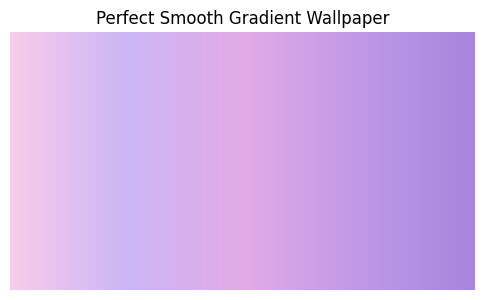

✅ Saved: /content/output/gradient_wallpaper.png


In [65]:
# 🧩 BLOCK 4 — Generate Perfectly Smooth Gradient Wallpaper
"""
Create a seamless horizontal gradient wallpaper from the full color palette.
"""

import numpy as np
from PIL import Image, ImageDraw

def generate_gradient_wallpaper(colors, width=900, height=500):
    """
    Generates a continuous smooth gradient across all colors.
    Colors: list of RGB tuples (0–255)
    """
    n = len(colors)
    img = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(img)

    # Convert colors to numpy array for better blending precision
    colors = np.array(colors, dtype=float)

    # Evenly spaced positions for each color along the width
    positions = np.linspace(0, width - 1, n)

    for x in range(width):
        # Find where we are between color stops
        pos = x / (width - 1) * (n - 1)
        idx = int(np.floor(pos))
        next_idx = min(idx + 1, n - 1)
        t = pos - idx  # blend ratio (0–1)
        color = (1 - t) * colors[idx] + t * colors[next_idx]
        draw.line([(x, 0), (x, height)], fill=tuple(map(int, color)))

    return img


# ✅ Generate and save
gradient_img = generate_gradient_wallpaper(colors_sorted)
gradient_path = "/content/output/gradient_wallpaper.png"
gradient_img.save(gradient_path)

display_image(gradient_img, "Perfect Smooth Gradient Wallpaper")
print(f"✅ Saved: {gradient_path}")


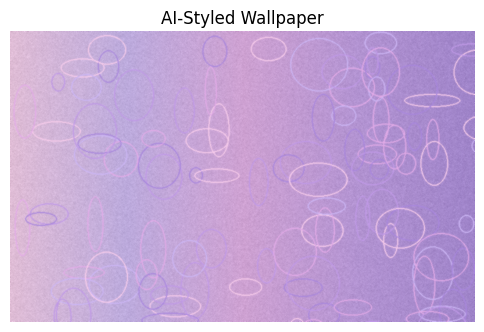

✅ Saved: /content/output/ai_wallpaper.png


In [71]:
# 🧩 BLOCK 5 — Generate AI-Styled Textured Wallpaper

def generate_ai_wallpaper(colors, width=800, height=500):
    base = generate_gradient_wallpaper(colors, width, height)
    noise = Image.effect_noise(base.size, 50)
    blended = Image.blend(base, noise.convert('RGB'), alpha=0.2)
    draw = ImageDraw.Draw(blended)
    for _ in range(100):
        color = random.choice(colors)
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = x1 + random.randint(20,100), y1 + random.randint(20,100)
        draw.ellipse([x1, y1, x2, y2], outline=color, width=2)
    final = blended.filter(ImageFilter.SMOOTH_MORE)
    return final

ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)

display_image(ai_wallpaper, "AI-Styled Wallpaper")
print(f"✅ Saved: {ai_path}")


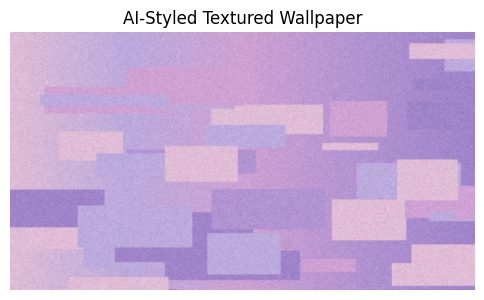

✅ Saved: /content/output/ai_wallpaper.png


In [50]:
# 🧩 BLOCK 5 — Generate AI-Styled Textured Wallpaper (Improved)
"""
Painterly AI wallpaper — layered gradients, soft noise, and random strokes.
"""

def generate_ai_wallpaper(colors, width=900, height=500):
    random.seed(42)
    base = generate_gradient_wallpaper(colors, width, height)
    draw = ImageDraw.Draw(base)

    # Add layered color strokes
    for _ in range(40):
        c = random.choice(colors)
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = x1 + random.randint(100,300), y1 + random.randint(10,80)
        draw.rectangle([x1, y1, x2, y2], fill=c, outline=None)

    # Overlay soft texture
    noise = Image.effect_noise(base.size, 60).convert("RGB")
    final = Image.blend(base, noise, alpha=0.2)
    return final.filter(ImageFilter.SMOOTH)

ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)

display_image(ai_wallpaper, "AI-Styled Textured Wallpaper")
print(f"✅ Saved: {ai_path}")

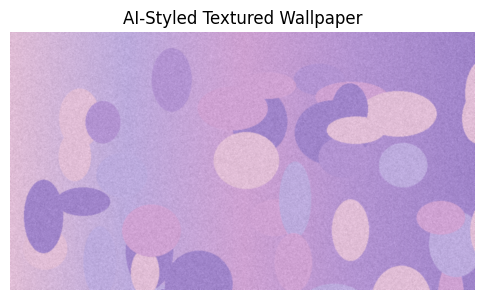

✅ Saved: /content/output/ai_wallpaper.png


In [52]:
# 🧩 BLOCK 5 — Generate AI-Styled Textured Wallpaper (Ellipses)
"""
Painterly AI wallpaper — layered gradients, soft noise, and random ellipses.
"""

def generate_ai_wallpaper(colors, width=900, height=500):
    random.seed(42)
    base = generate_gradient_wallpaper(colors, width, height)
    draw = ImageDraw.Draw(base)

    # Add layered color ellipses
    for _ in range(40):
        c = random.choice(colors)
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = x1 + random.randint(50,150), y1 + random.randint(50,150)
        draw.ellipse([x1, y1, x2, y2], fill=c, outline=None)

    # Overlay soft texture
    noise = Image.effect_noise(base.size, 60).convert("RGB")
    final = Image.blend(base, noise, alpha=0.2)
    return final.filter(ImageFilter.SMOOTH)

ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)

display_image(ai_wallpaper, "AI-Styled Textured Wallpaper")
print(f"✅ Saved: {ai_path}")


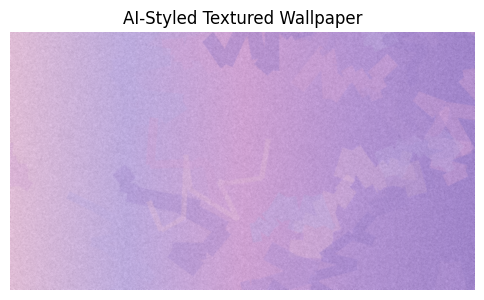

✅ Saved: /content/output/ai_wallpaper.png


In [77]:
from PIL import Image, ImageDraw, ImageFilter
import random
import math

def generate_ai_wallpaper(colors, width=900, height=500, seed=42):
    random.seed(seed)

    # Step 1: Gradient background
    base = generate_gradient_wallpaper(colors, width, height)
    draw = ImageDraw.Draw(base)

    # Step 2: Layered painterly strokes
    for _ in range(30):
        color = random.choice(colors)
        alpha = random.randint(80, 150)  # semi-transparent
        stroke_layer = Image.new("RGBA", base.size, (0,0,0,0))
        stroke_draw = ImageDraw.Draw(stroke_layer)

        # Draw random curved strokes
        x_start, y_start = random.randint(0, width), random.randint(0, height)
        length = random.randint(150, 400)
        angle = random.uniform(0, math.pi*2)
        points = [
            (x_start + math.cos(angle + i*0.1) * length*random.uniform(0.5,1.0),
             y_start + math.sin(angle + i*0.1) * length*random.uniform(0.5,1.0))
            for i in range(10)
        ]
        stroke_draw.line(points, fill=color + (alpha,), width=random.randint(10, 40))

        base = Image.alpha_composite(base.convert("RGBA"), stroke_layer)

    # Step 3: Add soft noise overlay
    noise = Image.effect_noise(base.size, 60).convert("RGB")
    textured = Image.blend(base.convert("RGB"), noise, alpha=0.2)

    # Step 4: Slight smoothing
    final = textured.filter(ImageFilter.SMOOTH_MORE)

    return final

# Usage
ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)

display_image(ai_wallpaper, "AI-Styled Textured Wallpaper")
print(f"✅ Saved: {ai_path}")


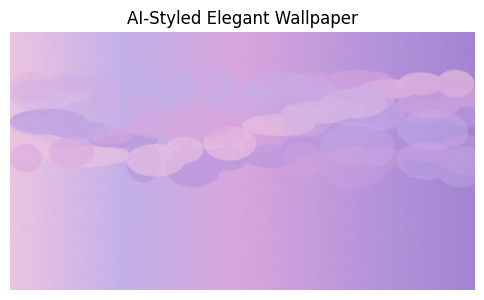

✅ Saved: /content/output/ai_wallpaper.png


In [92]:
from PIL import Image, ImageDraw, ImageFilter
import random
import math

def generate_ai_wallpaper(colors, width=900, height=500):
    # Base gradient
    base = generate_gradient_wallpaper(colors, width, height).convert("RGBA")

    # Layered flowing shapes
    for layer_index in range(6):
        layer = Image.new("RGBA", base.size, (0,0,0,0))
        draw = ImageDraw.Draw(layer)

        # Choose a color from palette, slightly lighter/darker per layer
        color = random.choice(colors)
        alpha = int(180 * (1 - layer_index/8))  # decreasing opacity for depth
        r, g, b = color
        color_rgba = (r, g, b, alpha)

        # Flowing strokes along subtle curves
        for i in range(12 + layer_index*2):
            x0 = int(width * i / 12)
            y0 = int(height * 0.3 + math.sin(i/3 + layer_index) * height*0.15)
            x1 = x0 + random.randint(60, 150)
            y1 = y0 + random.randint(30, 80)
            draw.ellipse([x0, y0, x1, y1], fill=color_rgba)

        base = Image.alpha_composite(base, layer)

    # Subtle noise for texture
    noise = Image.effect_noise(base.size, 30).convert("RGB")
    final = Image.blend(base.convert("RGB"), noise, alpha=0.1)

    # Slight smoothing
    final = final.filter(ImageFilter.SMOOTH_MORE)
    return final

# Usage
ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)
display_image(ai_wallpaper, "AI-Styled Elegant Wallpaper")
print(f"✅ Saved: {ai_path}")


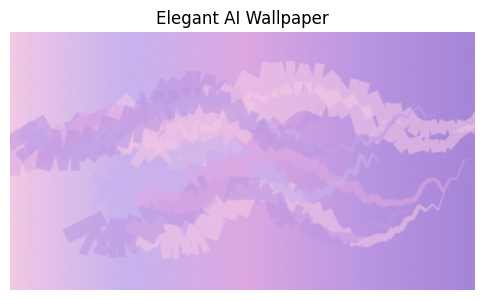

✅ Saved: /content/output/ai_wallpaper.png


In [97]:
from PIL import Image, ImageDraw, ImageFilter
import random
import math

def generate_elegant_ai_wallpaper(colors, width=900, height=500, ribbons=10):
    base = generate_gradient_wallpaper(colors, width, height).convert("RGBA")

    for _ in range(ribbons):
        layer = Image.new("RGBA", base.size, (0,0,0,0))
        draw = ImageDraw.Draw(layer)

        # Choose a base color
        r, g, b = random.choice(colors)

        # Start point of the ribbon
        x0 = random.randint(-100, width//3)
        y0 = random.randint(height//4, 3*height//4)
        length = random.randint(width//2, width)
        points = []

        # Generate a smooth flowing curve
        for t in range(50):
            dx = x0 + length * t/50
            dy = y0 + math.sin(t/5 + random.uniform(0,1)) * height*0.1
            points.append((dx, dy))

        # Draw variable-width ribbon along the curve
        max_width = random.randint(40, 120)
        for i, (px, py) in enumerate(points[:-1]):
            next_px, next_py = points[i+1]
            width_i = int(max_width * (1 - i/len(points)))
            draw.line([px, py, next_px, next_py], fill=(r,g,b,150), width=width_i)

        base = Image.alpha_composite(base, layer)

    # Add subtle noise for texture
    noise = Image.effect_noise(base.size, 20).convert("RGB")
    final = Image.blend(base.convert("RGB"), noise, alpha=0.05)

    final = final.filter(ImageFilter.SMOOTH_MORE)
    return final

# Usage
ai_wallpaper = generate_elegant_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)
display_image(ai_wallpaper, "Elegant AI Wallpaper")
print(f"✅ Saved: {ai_path}")


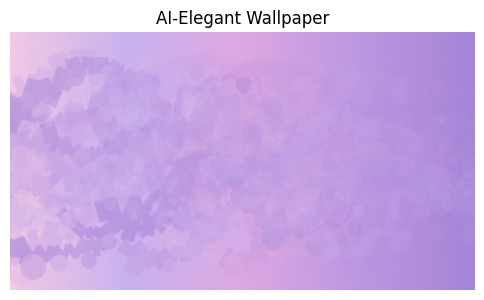

✅ Saved: /content/output/ai_wallpaper.png


In [101]:
from PIL import Image, ImageDraw, ImageFilter
import random
import math

def generate_ai_elegant_wallpaper(colors, width=900, height=500, layers=6):
    # Base gradient background
    base = generate_gradient_wallpaper(colors, width, height).convert("RGBA")

    for l in range(layers):
        layer = Image.new("RGBA", base.size, (0,0,0,0))
        draw = ImageDraw.Draw(layer)

        # Select color and alpha for the layer
        r, g, b = random.choice(colors)
        base_alpha = int(180 * (1 - l/layers))

        # Generate a few flowing shapes per layer
        for _ in range(5 + l*2):
            # Shape parameters
            points = []
            start_x = random.randint(-width//4, width//2)
            start_y = random.randint(height//4, 3*height//4)
            length = random.randint(width//2, width)
            waves = random.uniform(0.1, 0.3)

            for t in range(50):
                x = start_x + t * length / 50
                y = start_y + math.sin(t * waves + random.uniform(0,1)) * height*0.15
                points.append((x, y))

            # Draw flowing brush stroke along points
            max_width = random.randint(20, 80)
            for i, (px, py) in enumerate(points[:-1]):
                next_px, next_py = points[i+1]
                width_i = int(max_width * (1 - i/len(points)))
                alpha_i = int(base_alpha * (1 - i/len(points)))
                draw.line([px, py, next_px, next_py], fill=(r, g, b, alpha_i), width=width_i)

            # Add soft ellipse splashes along the path
            for i, (px, py) in enumerate(points[::5]):
                size = random.randint(10, 50)
                alpha_i = int(base_alpha * random.uniform(0.2, 0.6))
                draw.ellipse([px, py, px+size, py+size], fill=(r, g, b, alpha_i))

        # Merge layer with base
        base = Image.alpha_composite(base, layer)

    # Overlay gentle noise for texture
    noise = Image.effect_noise(base.size, 20).convert("RGB")
    final = Image.blend(base.convert("RGB"), noise, alpha=0.05)

    # Slight smoothing
    final = final.filter(ImageFilter.SMOOTH_MORE)

    return final

# Usage
ai_wallpaper = generate_ai_elegant_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)
display_image(ai_wallpaper, "AI-Elegant Wallpaper")
print(f"✅ Saved: {ai_path}")



🎨 Complementary Scheme:
{'purpose': 'Contrast and highlight colors.'}


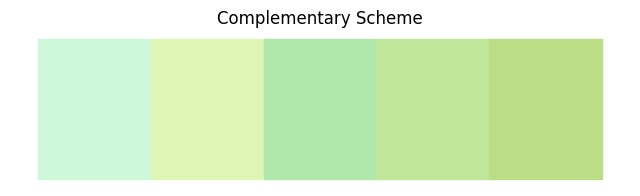


🎨 Analogous Scheme:
{'purpose': 'Smooth transitions for cohesive designs.'}


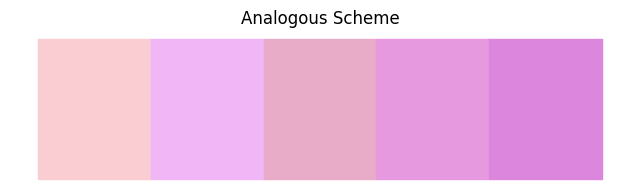


🎨 Triadic Scheme:
{'purpose': 'Balanced variety for visual harmony.'}


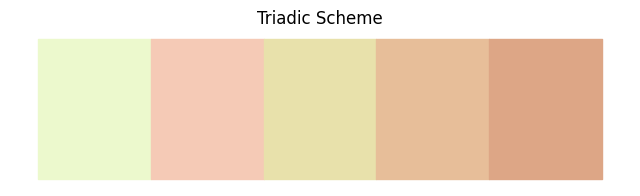

In [56]:
# 🧩 BLOCK 6 — Generate Color Harmony Schemes (with Explanations)
"""
Visualize complementary, analogous, and triadic color harmonies.
"""

def generate_color_harmonies(base_colors):
    harmonies = {}
    for name, shift in {"Complementary":0.5, "Analogous":0.1, "Triadic":0.33}.items():
        shifted = []
        for c in base_colors:
            r,g,b = [x/255 for x in c]
            h,s,v = colorsys.rgb_to_hsv(r,g,b)
            h = (h + shift) % 1.0
            r2,g2,b2 = [int(x*255) for x in colorsys.hsv_to_rgb(h,s,v)]
            shifted.append((r2,g2,b2))
        harmonies[name] = shifted
    return harmonies

harmonies = generate_color_harmonies(colors_sorted)

for name, cols in harmonies.items():
    print(f"\n🎨 {name} Scheme:")
    print({
        "purpose": {
            "Complementary": "Contrast and highlight colors.",
            "Analogous": "Smooth transitions for cohesive designs.",
            "Triadic": "Balanced variety for visual harmony."
        }[name]
    })
    create_color_bar([rgb_to_hex(c) for c in cols], f"{name} Scheme")

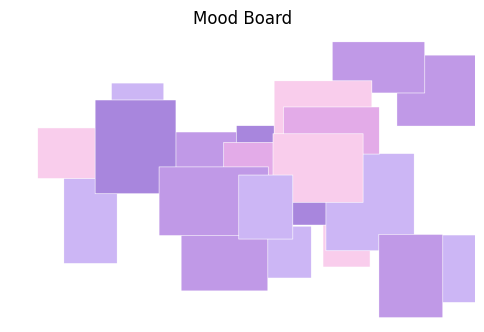

✅ Saved: /content/output/moodboard.png


In [55]:
# 🧩 BLOCK 7 — Create Mood Board

def generate_mood_board(colors, width=800, height=500):
    img = Image.new("RGB", (width, height), (255,255,255))
    draw = ImageDraw.Draw(img)
    for _ in range(20):
        color = random.choice(colors)
        x1, y1 = random.randint(0,width-100), random.randint(0,height-100)
        x2, y2 = x1+random.randint(80,200), y1+random.randint(80,200)
        draw.rectangle([x1, y1, x2, y2], fill=color, outline=(255,255,255))
    return img

moodboard = generate_mood_board(colors_sorted)
moodboard_path = "/content/output/moodboard.png"
moodboard.save(moodboard_path)

display_image(moodboard, "Mood Board")
print(f"✅ Saved: {moodboard_path}")


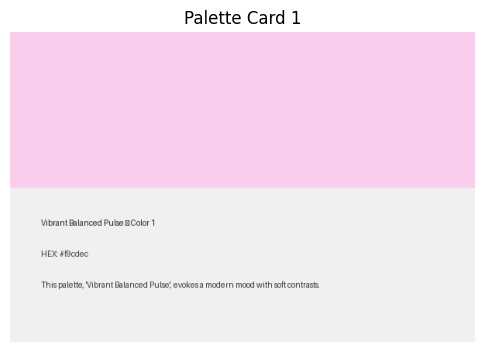

✅ Saved: /content/output/palette_card_1.png


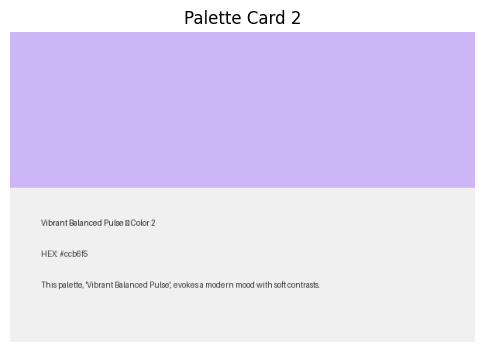

✅ Saved: /content/output/palette_card_2.png


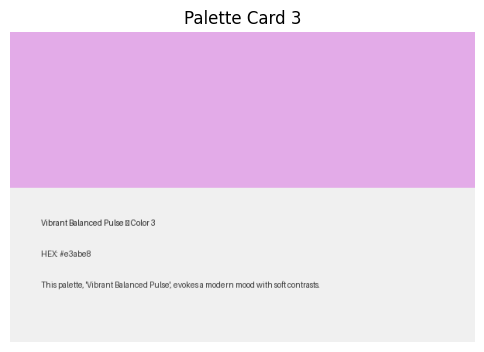

✅ Saved: /content/output/palette_card_3.png


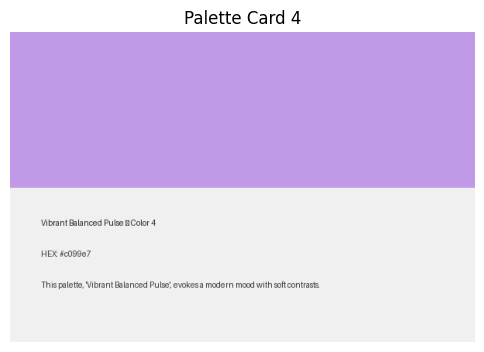

✅ Saved: /content/output/palette_card_4.png


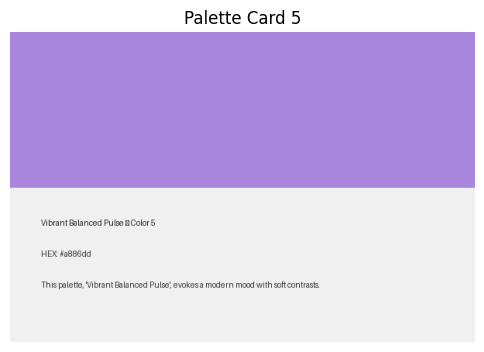

✅ Saved: /content/output/palette_card_5.png


In [64]:
# 🧩 BLOCK 7A — Generate Individual Palette Cards (One for Each Color)
"""
Create one palette card per color in the palette.
"""

def generate_single_color_card(color, name, story, idx, width=600, height=400):
    img = Image.new("RGB", (width, height), (240, 240, 240))
    draw = ImageDraw.Draw(img)

    # Big color block at the top
    draw.rectangle([0, 0, width, height//2], fill=color)

    # Palette name and story
    title_pos = (40, height//2 + 40)
    story_pos = (40, height//2 + 80)
    hex_code = rgb_to_hex(color)

    draw.text(title_pos, f"{name} — Color {idx+1}", fill=(30,30,30))
    draw.text(story_pos, f"HEX: {hex_code}", fill=(50,50,50))
    draw.text((40, height//2 + 120), story, fill=(50,50,50))

    return img

# Generate all five cards
for i, color in enumerate(colors_sorted):
    card = generate_single_color_card(color, palette_name, story, i)
    card_path = f"/content/output/palette_card_{i+1}.png"
    card.save(card_path)
    display_image(card, f"Palette Card {i+1}")
    print(f"✅ Saved: {card_path}")


Enter path to another image for palette filter: /content/rainbow-glitter-sparkle-background-birthday-fun-colorful-featuring-pink-blue-green-purple-yellow-colors-perfect-party-363830028.webp


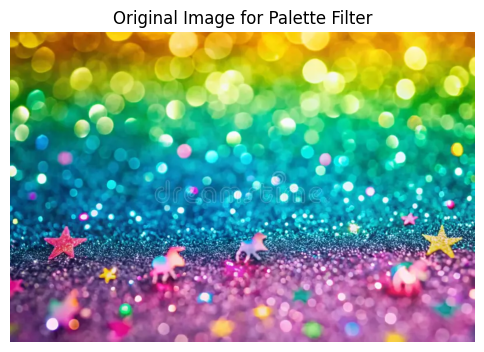

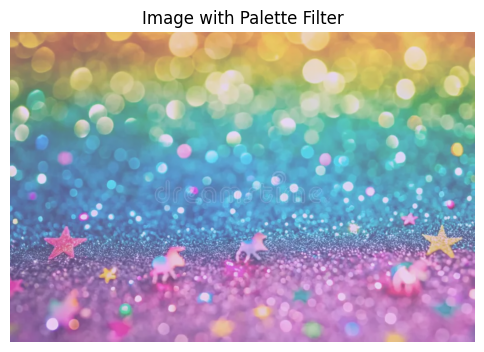

✅ Saved: /content/output/palette_filter.png


In [62]:
# 🧩 BLOCK 8 — Apply Palette Filter to Another Image (Fixed)
"""
Let user upload another image and tint it using extracted color palette.
"""

def apply_palette_filter(image, palette):
    """Apply a subtle tint using the average of the palette colors."""
    # Compute the average color from the palette
    avg_color = np.mean(palette, axis=0).astype(int)
    avg_color_tuple = tuple(avg_color)

    # Create overlay using the average color and blend
    overlay = Image.new("RGB", image.size, avg_color_tuple)
    return Image.blend(image, overlay, alpha=0.4)  # Increased alpha for more noticeable effect

filter_path = input("Enter path to another image for palette filter: ").strip()
img2 = Image.open(filter_path).convert('RGB')
display_image(img2, "Original Image for Palette Filter")

filtered_img = apply_palette_filter(img2, colors_sorted)
filtered_path = "/content/output/palette_filter.png"
filtered_img.save(filtered_path)

display_image(filtered_img, "Image with Palette Filter")
print(f"✅ Saved: {filtered_path}")
